In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from draw_functions import *
from kstest import *
import itertools

In [4]:
#read csv
df = pd.read_csv('../csv/Tables_des_ResultCurve_id_de_la_commande.csv')

#ajout du slope
df['slope'] = df.groupby('ResultCurve_id').apply(lambda group: group['xvalue'].diff() / group['xtime'].diff(), include_groups=False).reset_index(level=0, drop=True)
df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)]
df

FileNotFoundError: [Errno 2] No such file or directory: '../csv/Tables_des_ResultCurve_id_de_la_commande.csv'

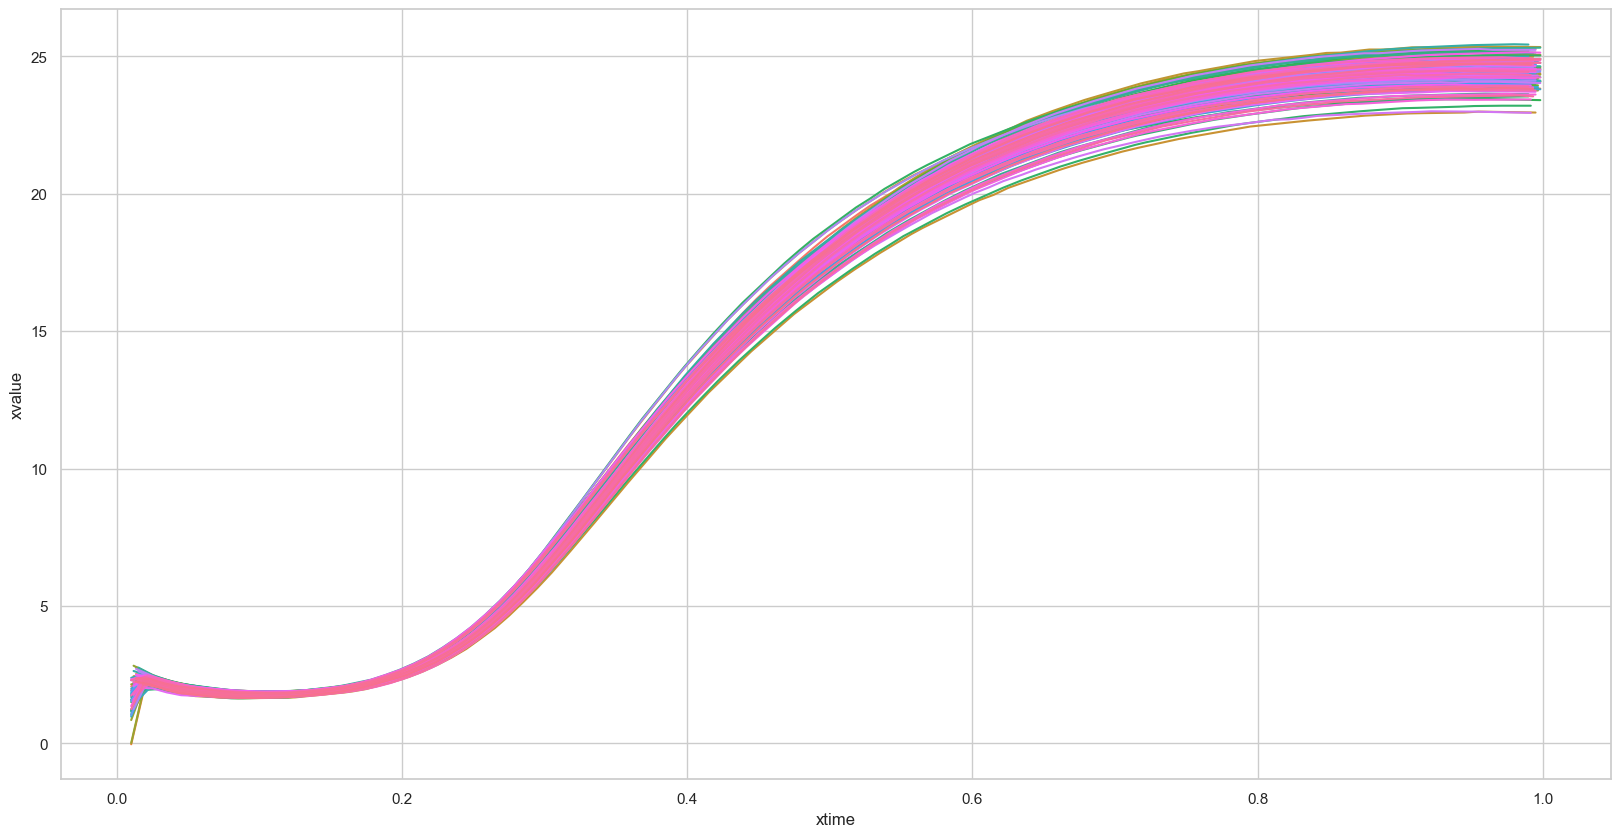

In [12]:
dessiner_commande(df)

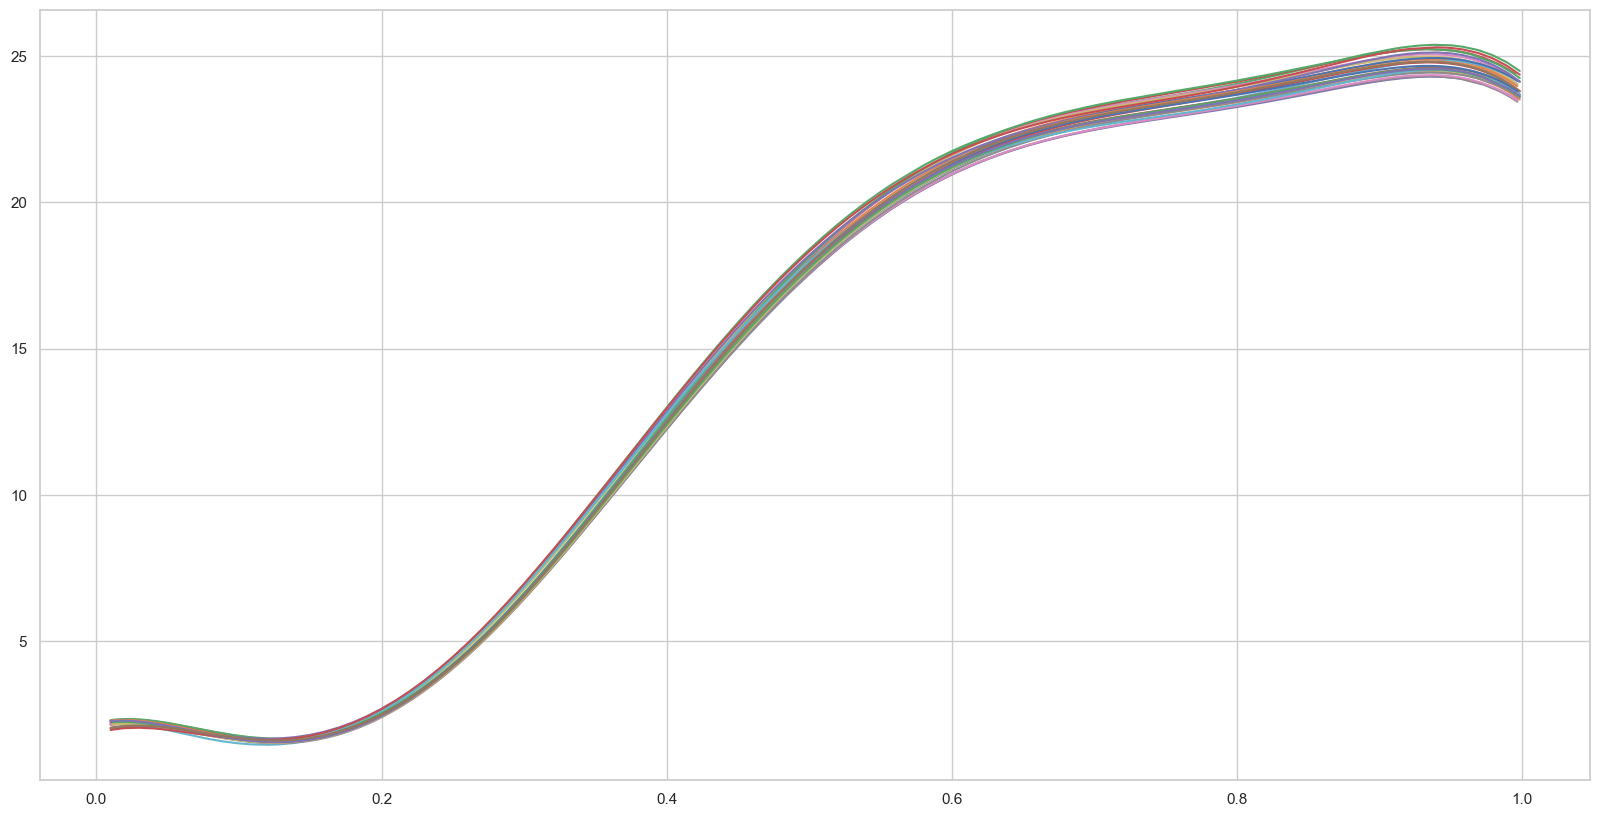

In [13]:
dessiner_commande(df,degree=6)

## Analyse des pentes

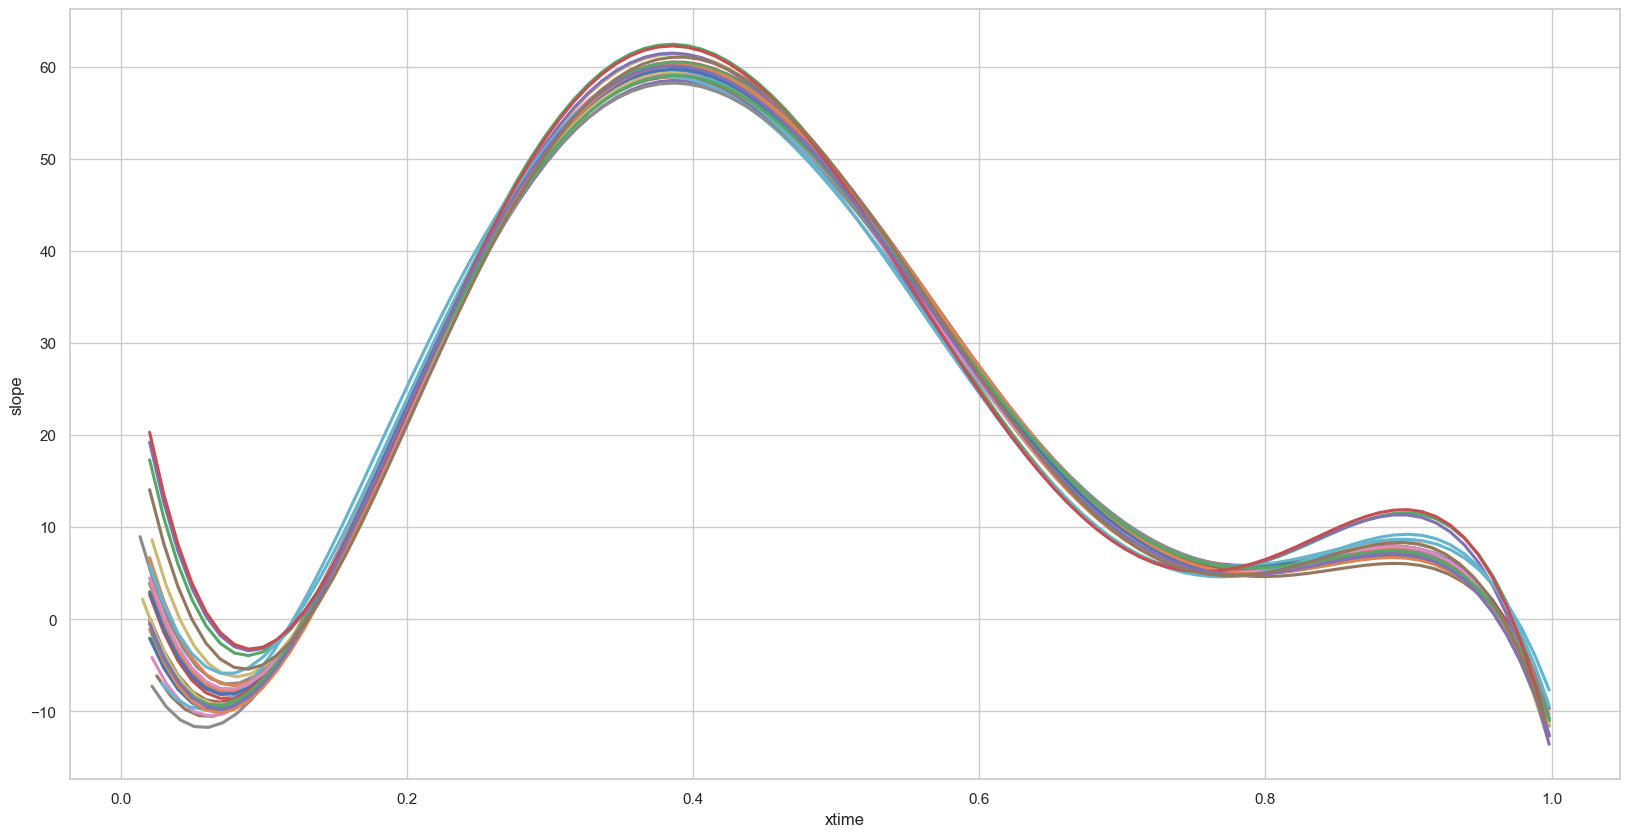

In [14]:
dessiner_commande_slope(df,5,unified=True)

- Batch 013024D: 2.423613537266549
- Batch 011722D: 2.3557977088603916
- Batch 013725D: 2.293240486680836
- Batch 005318D: 1.4673503103808643
- Batch 231502D: 1.4325742843040765
- Batch 002213D: 1.4324248166730034
- Batch 012423D: 1.3201670842981437
- Batch 001011D: 1.1653492100618987
- Batch 230801D: 1.0102919581592305
- Batch 233505D: 0.9529872726176001
- Batch 014326D: 0.8417789477752877
- Batch 003415D: 0.8104444740345438
- Batch 010520D: 0.8041400485021497
- Batch 232303D: 0.7315220422642222
- Batch 234707D: 0.7098343183059461
- Batch 234106D: 0.7074106964302392
- Batch 002814D: 0.6994969238522906
- Batch 004016D: 0.699149697132801
- Batch 001612D: 0.6709839408669103
- Batch 005919D: 0.5966829762124668
- Batch 011121D: 0.5843759016238892
- Batch 232904D: 0.564363646032092
- Batch 235208D: 0.5451265800777791
- Batch 004717D: 0.5444263897678595
- Batch 235809D: 0.5318852645566364
- Batch 000410D: 0.4936231543661803


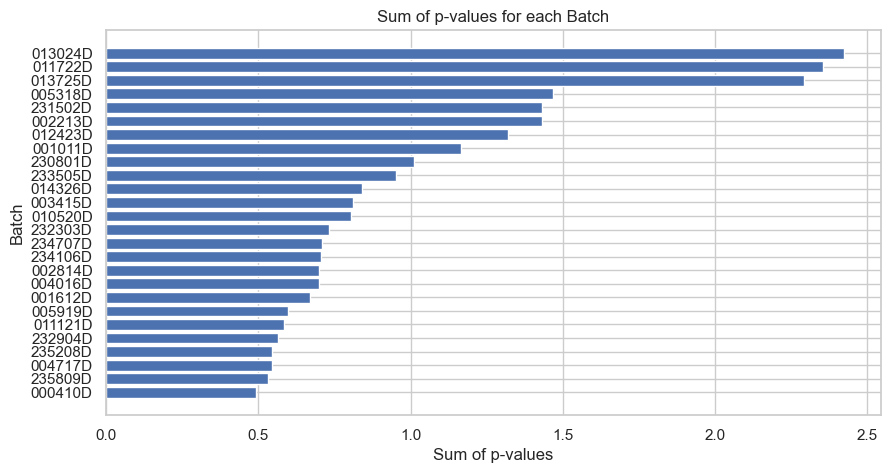

In [15]:
batch_pvalues = ks_test_slope(df, 6)

visualiser_pvalue(batch_pvalues, True)

- Batch 234707D: 1.9712096512079973
- Batch 231502D: 1.7754171423290994
- Batch 011722D: 1.5943660798070627
- Batch 234106D: 1.5600858885354072
- Batch 232303D: 1.5377207386281655
- Batch 003415D: 1.4775817800764455
- Batch 013024D: 1.446611489523635
- Batch 002814D: 1.4465963345951334
- Batch 233505D: 1.4012378185865761
- Batch 002213D: 1.2784001406548429
- Batch 001011D: 1.272304641640337
- Batch 013725D: 1.24068533417503
- Batch 000410D: 1.235743531179078
- Batch 005318D: 1.2348280343172895
- Batch 230801D: 1.1752467419989518
- Batch 010520D: 1.1570659044067029
- Batch 001612D: 1.1322995414089325
- Batch 011121D: 1.1092510662804573
- Batch 235208D: 1.0927188256146068
- Batch 004717D: 1.0716989206989826
- Batch 005919D: 1.07007337491271
- Batch 012423D: 1.0573846347155667
- Batch 014326D: 0.9773732283385955
- Batch 232904D: 0.9633808047319345
- Batch 235809D: 0.9578797535741471
- Batch 004016D: 0.9493082712156754


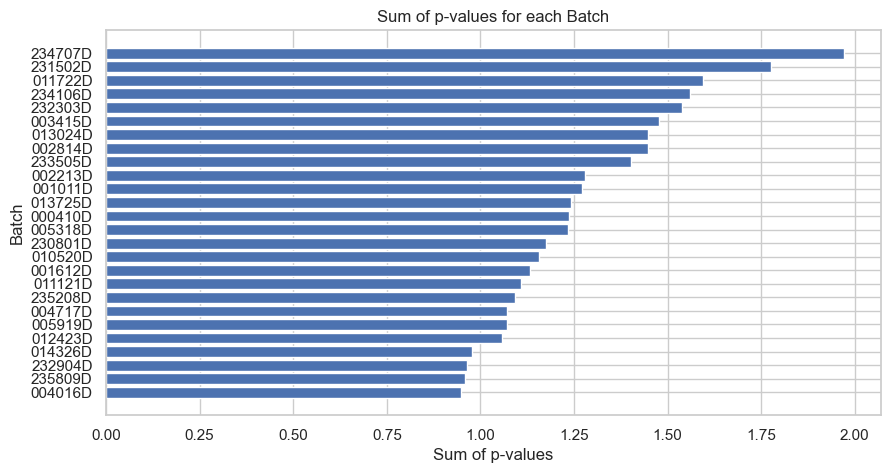

In [19]:
batch_pvalues = ks_test_value(df, 6)

visualiser_pvalue(batch_pvalues, True)

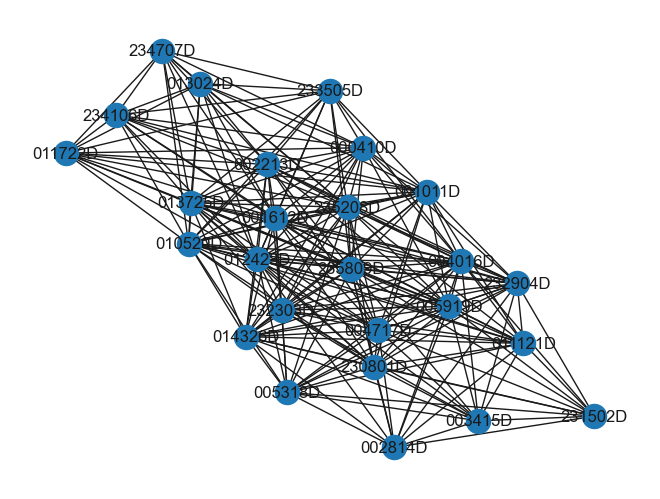

In [17]:
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Add nodes for each batch
for batch in df['Batch'].unique():
    G.add_node(batch)

# Calculate the KS test p-value for each pair of batches and add edges
for batch1, batch2 in itertools.combinations(df['Batch'].unique(), 2):
    pvalue = Batch_ks_value_test(df, batch1, batch2, degree=6)
    if not pd.isna(pvalue) and pvalue > 0.05:
        # Use the inverse of the p-value as the weight (distance)
        G.add_edge(batch1, batch2)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True)

plt.show()

In [18]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_xtime = df_02_08.loc[df_02_08.groupby('Batch')['slope'].idxmax()]['xtime']

# Calculer la différence entre le max et le min des xtime
max_diff = max_slope_xtime.max() - max_slope_xtime.min()

print("La plus grande différence des xtime entre les max des pentes des différentes batch est :", round(max_diff*60,3), "secondes")

La plus grande différence des xtime entre les max des pentes des différentes batch est : 5.0 secondes


In [1]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_sample_xtime = \
df_02_08.loc[df_02_08.groupby('Sample_Code')['slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
max_slope_batch_xtime = max_slope_sample_xtime.groupby('Batch').median()

# Calculer la médiane de xtime pour chaque groupe
median_xtime = max_slope_sample_xtime.median()

# Calculer la différence entre le xtime du max de la pente et la médiane de xtime pour chaque groupe
diff = max_slope_batch_xtime - 0.4649999999999999

# Sort the differences by their absolute values in descending order
diff_sorted = diff.abs().sort_values(ascending=False)

# Print the differences in the sorted order
for batch in diff_sorted.index:
    print(f"La différence de temps entre le max de la pente et la médiane pour le batch {batch} est : {round(diff_sorted[batch] * 60, 3)} seconde")

NameError: name 'df_02_08' is not defined

In [ ]:
round(np.std(max_slope_sample_xtime) * 1000, 2)